In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_partidos = pd.read_csv("./data/partidos_cebollitas.csv")

df_partidos["diferencia_goles"] = df_partidos["goles_local"] - df_partidos["goles_visitante"]

X = df_partidos[(df_partidos["equipo_local"] == "Cebollitas FC")][["posesion_local (%)", "tiros_arco_local"]]
y = df_partidos[(df_partidos["equipo_local"] == "Cebollitas FC")]["diferencia_goles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

df_resultados = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_resultados.head(9)

,Actual,Predicted
37,-1,-1.479600
67,3,-1.764086
2,1,-1.165152
94,0,0.437051
45,3,0.017896
38,0,-1.255041


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 6.378916648868558
Mean Absolute Error: 2.0138391662289727
R2 Score: -1.7338214209436678


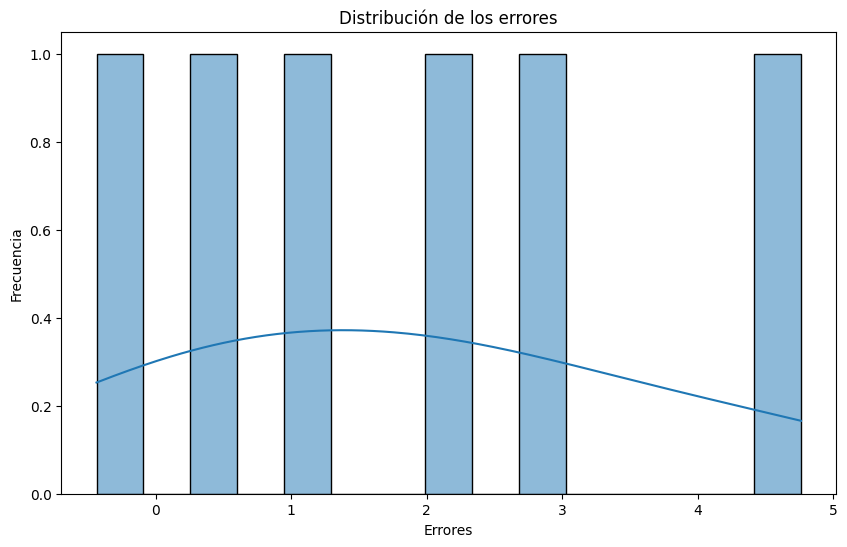

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title("Distribución de los errores")
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.show()